In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tifffile as tf
import pickle
from datetime import datetime
import os
from skimage.color import label2rgb
import sys
sys.path.append("../../")
from functions_EDX import *

### EDX colors of interest

In [5]:
indices = [3,4,6,1,9,7]
colors = [[1,0,0], [0,1,0], [0,0,1], [0,1,1], [1,0,1], [1,1,0]]

### load the stack of haadfs, SAM masks, abundance maps

In [6]:
# haadf stack
haadf_stack = tf.imread("../../../../primary_data/main_mosaic_5by6_haadf.tiff")  

# location of SAM masks
masks_path = '../../../../primary_data/main_mosaic_6by5/SAM_masks/'

# abundance maps
abundance_maps = np.load("../../../../primary_data/abundance_maps.npz")['arr_0']
print('abundance maps shape',abundance_maps.shape)

abundance maps shape (11, 1024, 1024, 30)


### Output path for the tiffs and options

In [9]:
area_thresh = 500000
overlay_haadf = True
alpha = 0.35
#out_dir = '../../../../primary_data/main_mosaic_6by5/SAM_EDX_masks_tiff/'
out_dir = '../../../../primary_data/main_mosaic_6by5/SAM_EDX_masks_png/'

/var/folders/77/2p3cpr_n18s6qc_nxslbsp3r0000gn/T/ipykernel_3843/437480041.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f,ax = plt.subplots(figsize=(2,2))


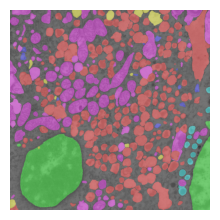

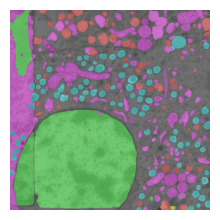

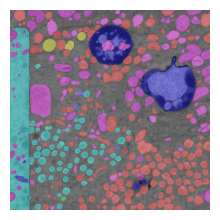

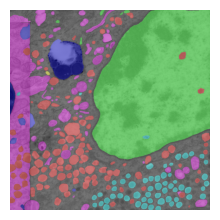

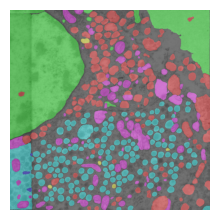

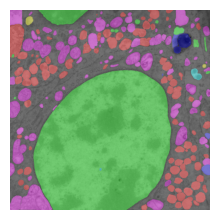

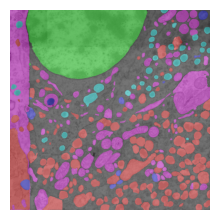

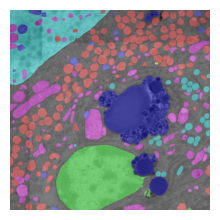

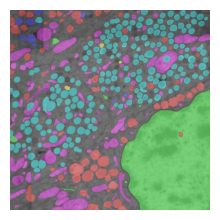

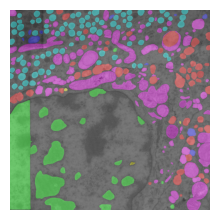

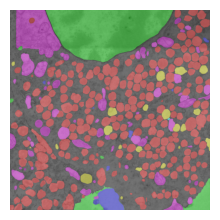

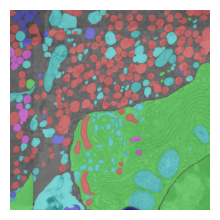

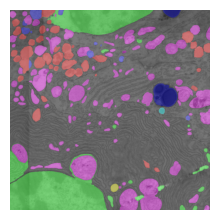

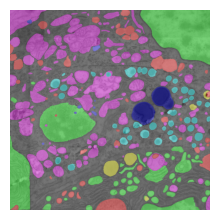

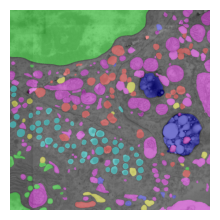

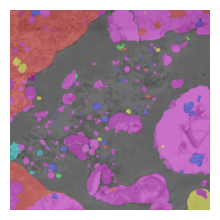

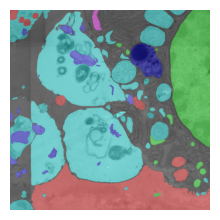

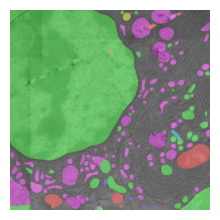

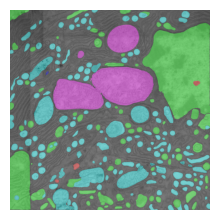

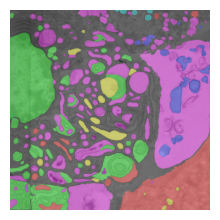

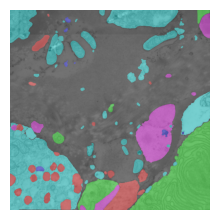

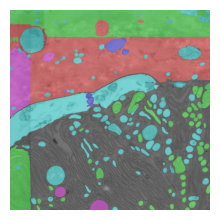

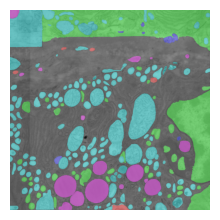

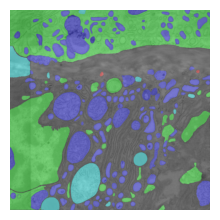

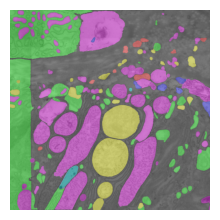

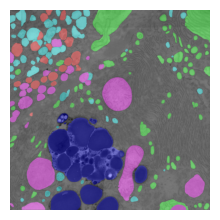

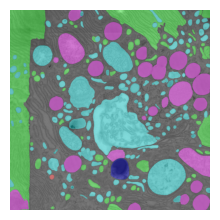

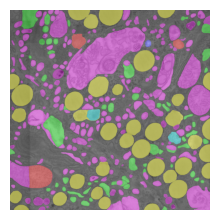

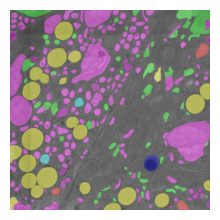

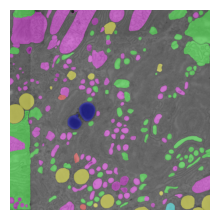

In [11]:
sub_dir = 'haadf_%s_alpha_%02d_maxarea_%07d' % (str(overlay_haadf),int(alpha*100),area_thresh)
try:
    os.mkdir(os.path.join(out_dir,sub_dir))
    outpath = os.path.join(out_dir,sub_dir)
except:
    print('These options already exist.')
    sys.exit(1)
        
for tile_idx in range(abundance_maps.shape[3]):
    haadf = haadf_stack[tile_idx,:,:] 
    abundance_tile = abundance_maps[indices,:,:,tile_idx]
    
    # masks
    # Get the masks
    file = open(os.path.join(masks_path,'tile_%02d.pkl' % tile_idx),'rb')
    masks = pickle.load(file)
    
    if overlay_haadf:
        SamEDXImg,img_clr_idx = show_anns_EDX(masks,abundance_tile,colors=colors,display=False,alpha = alpha,area_thresh=area_thresh)
        Img = label2rgb(img_clr_idx, image=haadf,colors=colors,kind='overlay',alpha = alpha,bg_label=-1)
        
        #tf.imwrite(os.path.join(outpath,'tile_%02d.tiff' % tile_idx),Img)
    else:
        Img = show_anns_EDX(masks,abundance_tile,colors=colors,display=False,alpha = alpha,area_thresh=area_thresh)
        #tf.imwrite(os.path.join(outpath,'tile_%02d.tiff' % tile_idx),(Img*255).astype('uint8'))
    
    f,ax = plt.subplots(figsize=(2,2))
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    ax.imshow(Img,cmap='gray_r')
    plt.margins(0,0)
    plt.axis('off')
    plt.savefig(os.path.join(outpath,'tile_%02d.png' % tile_idx),dpi=300) #,bbox_inches='tight')
    